In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [80]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/smoking.csv')

In [81]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [6]:
df.shape

(55692, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

There is zero null value, thats a good thing.

Hiç null değer yok, bu bizim için iyi bir şey.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


# EDA

<AxesSubplot: xlabel='smoking', ylabel='count'>

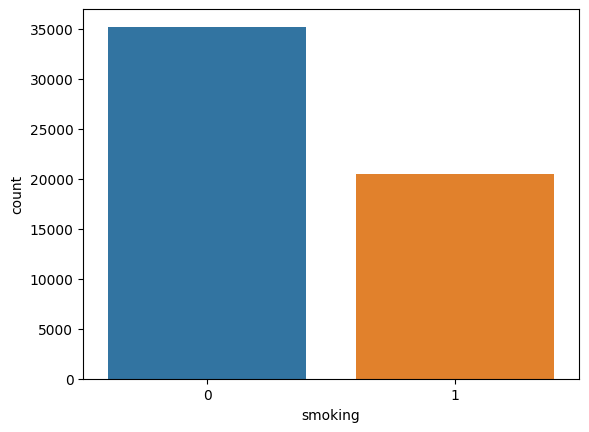

In [9]:
sns.countplot(data= df, x="smoking")

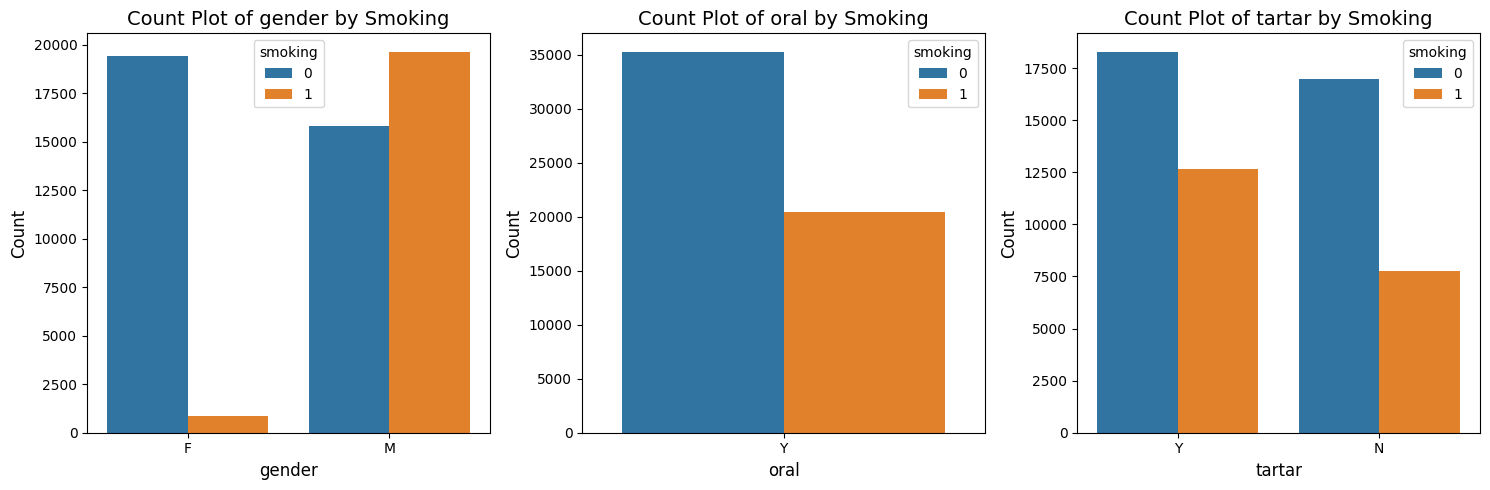

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
j = [i for i in df.columns if df[i].dtypes == 'object' and i != 'smoking']
for i, ax in enumerate(axes.flatten()[:len(j)]):
    sns.countplot(x=j[i], hue='smoking', data=df, ax=ax)
    ax.set_xlabel(j[i], fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"Count Plot of {j[i]} by Smoking", fontsize=14)
plt.tight_layout()

In [64]:
columns = [i for i in df.columns if (df[i].dtypes == 'float64' or df[i].dtypes == 'int64') and (i != 'smoking' and i != 'ID')]

## Box Plot

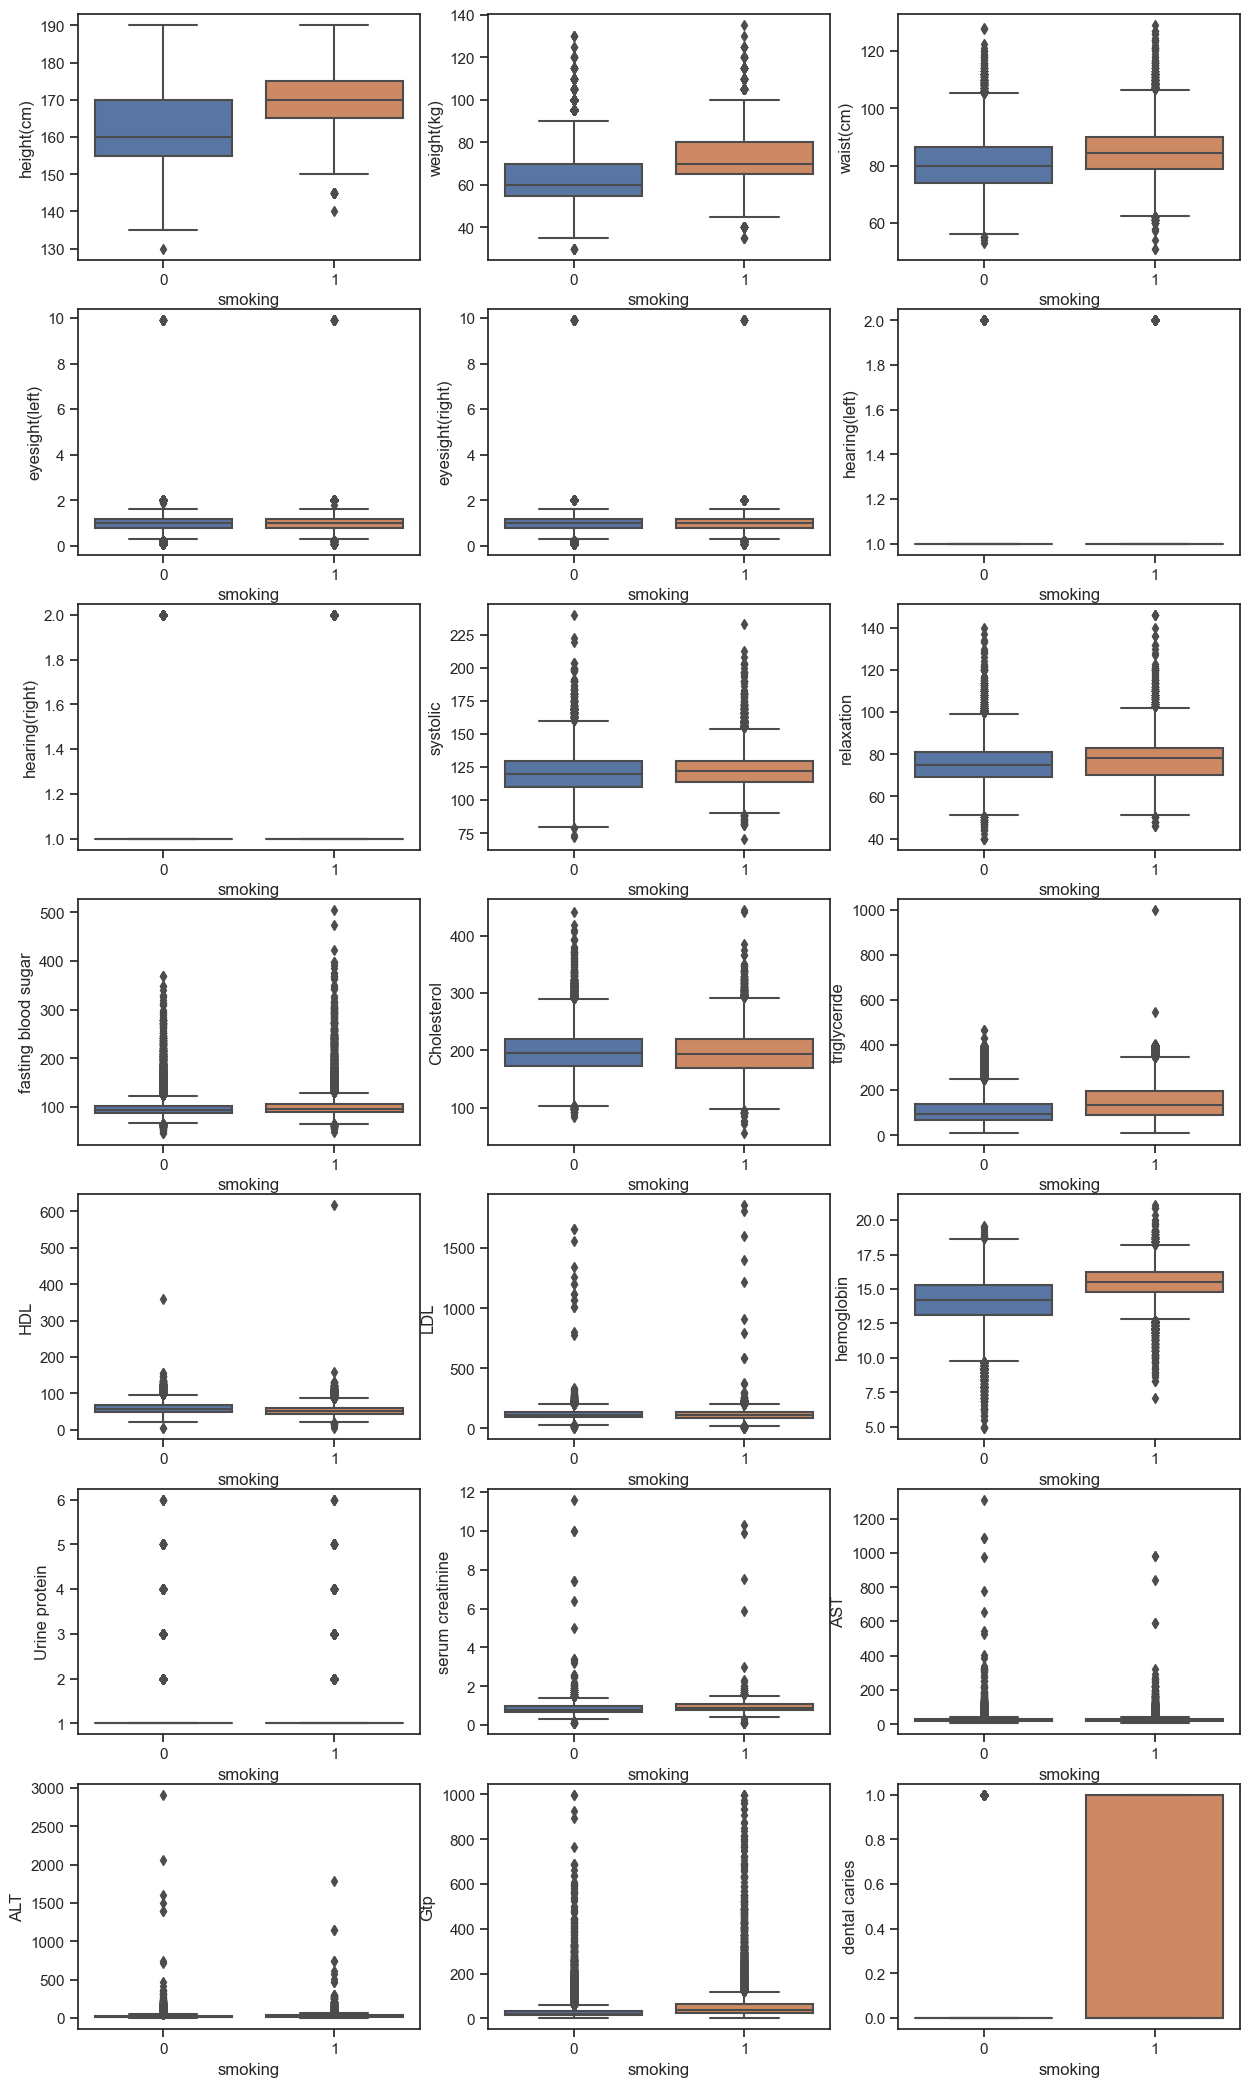

In [65]:
sns.set(style='ticks')
plt.figure(figsize=(15,30))

for i in range(1,len(columns)):
    plt.subplot(8,3,i)
    sns.boxplot(x='smoking', y=columns[i], data=df)

## Violin Plot

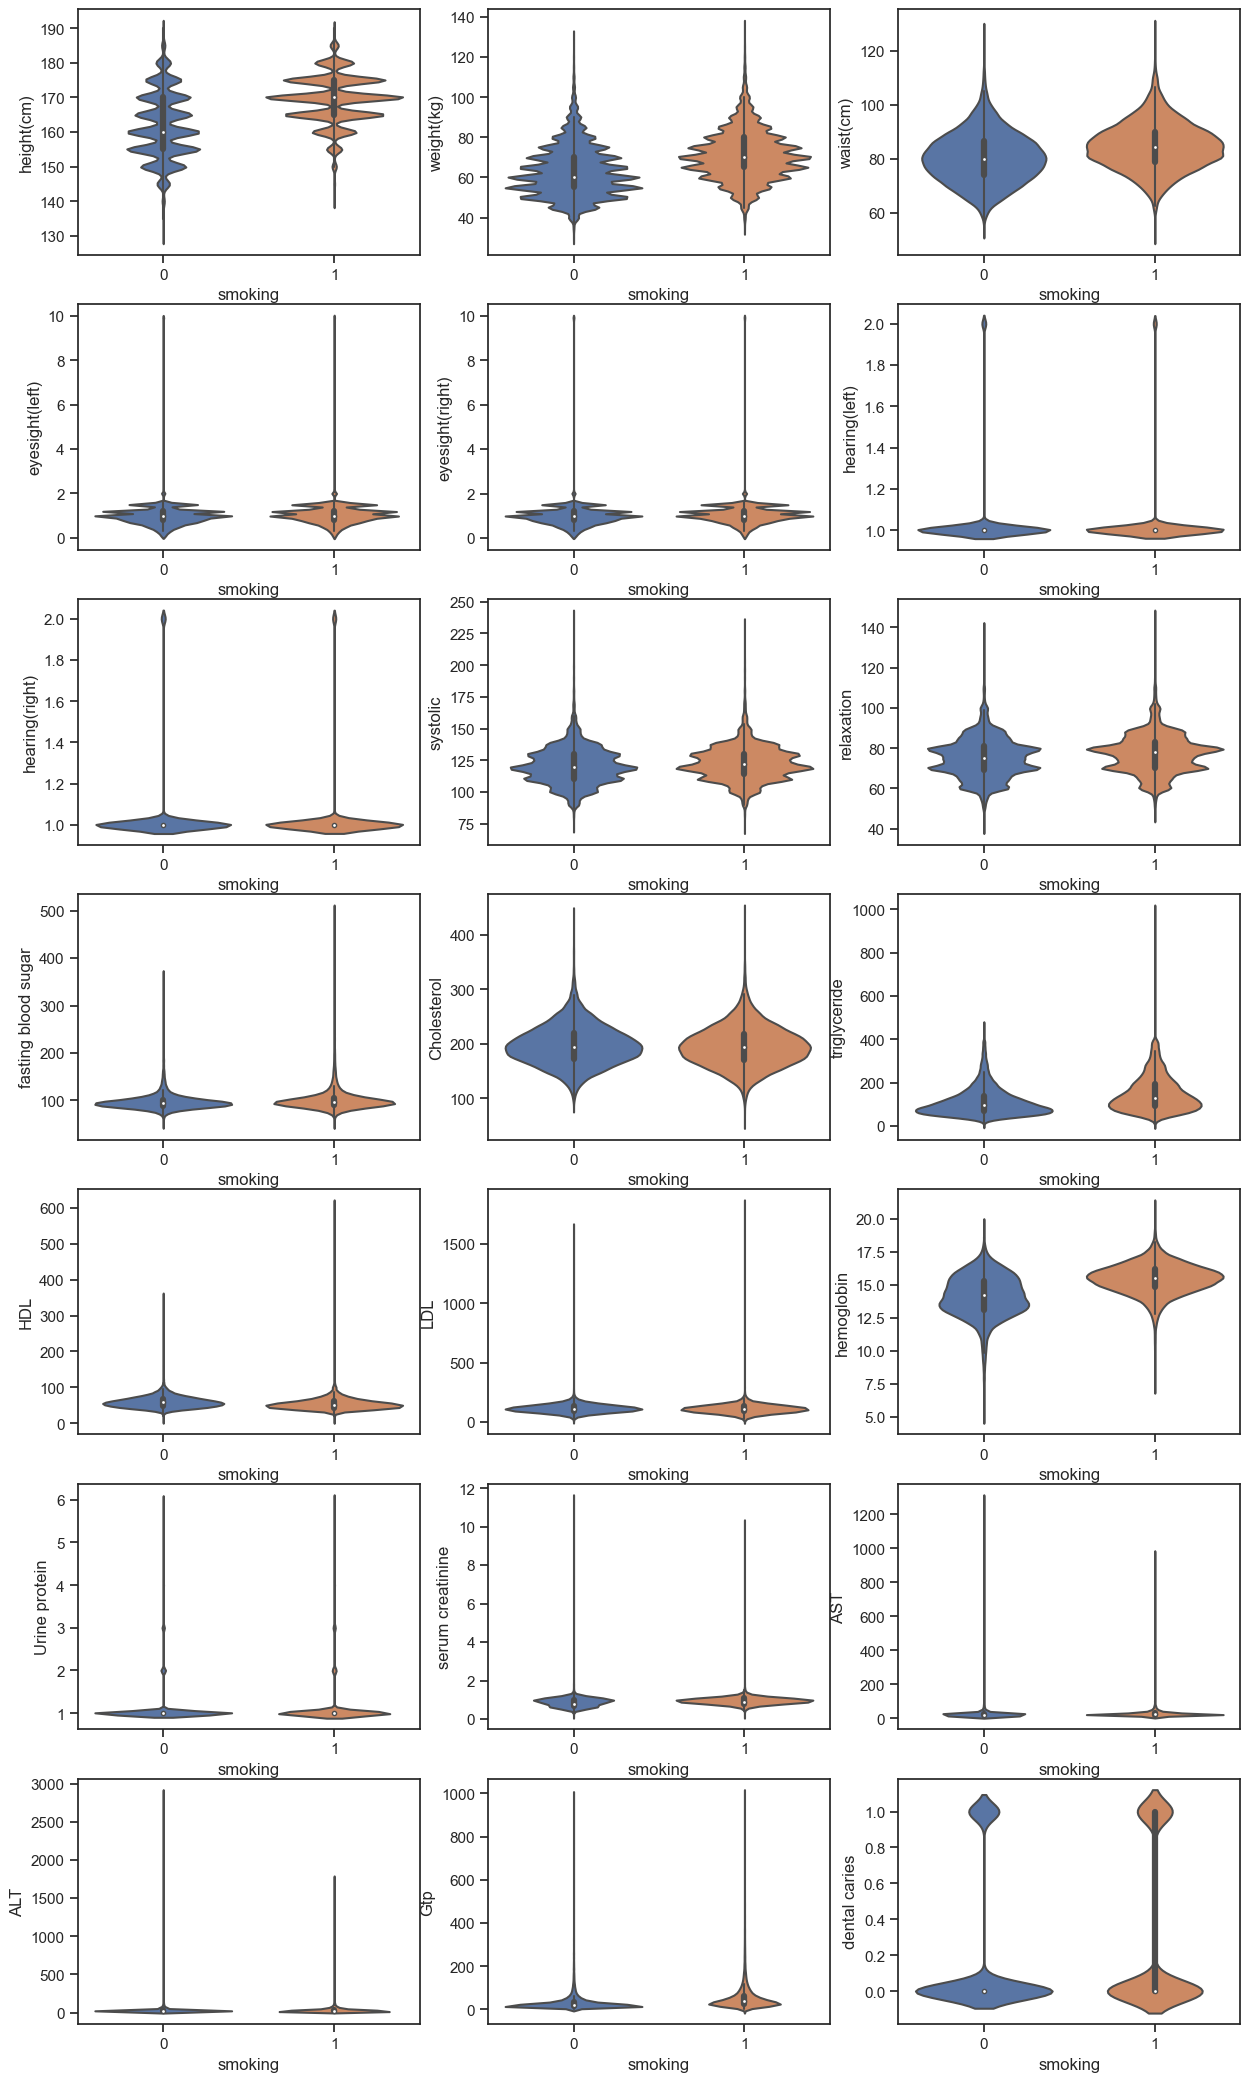

In [66]:
sns.set(style='ticks')
plt.figure(figsize=(15,30))

for i in range(1,len(columns)):
    plt.subplot(8,3,i)
    sns.violinplot(x='smoking', y=columns[i], data=df)

## Heatmap

[]

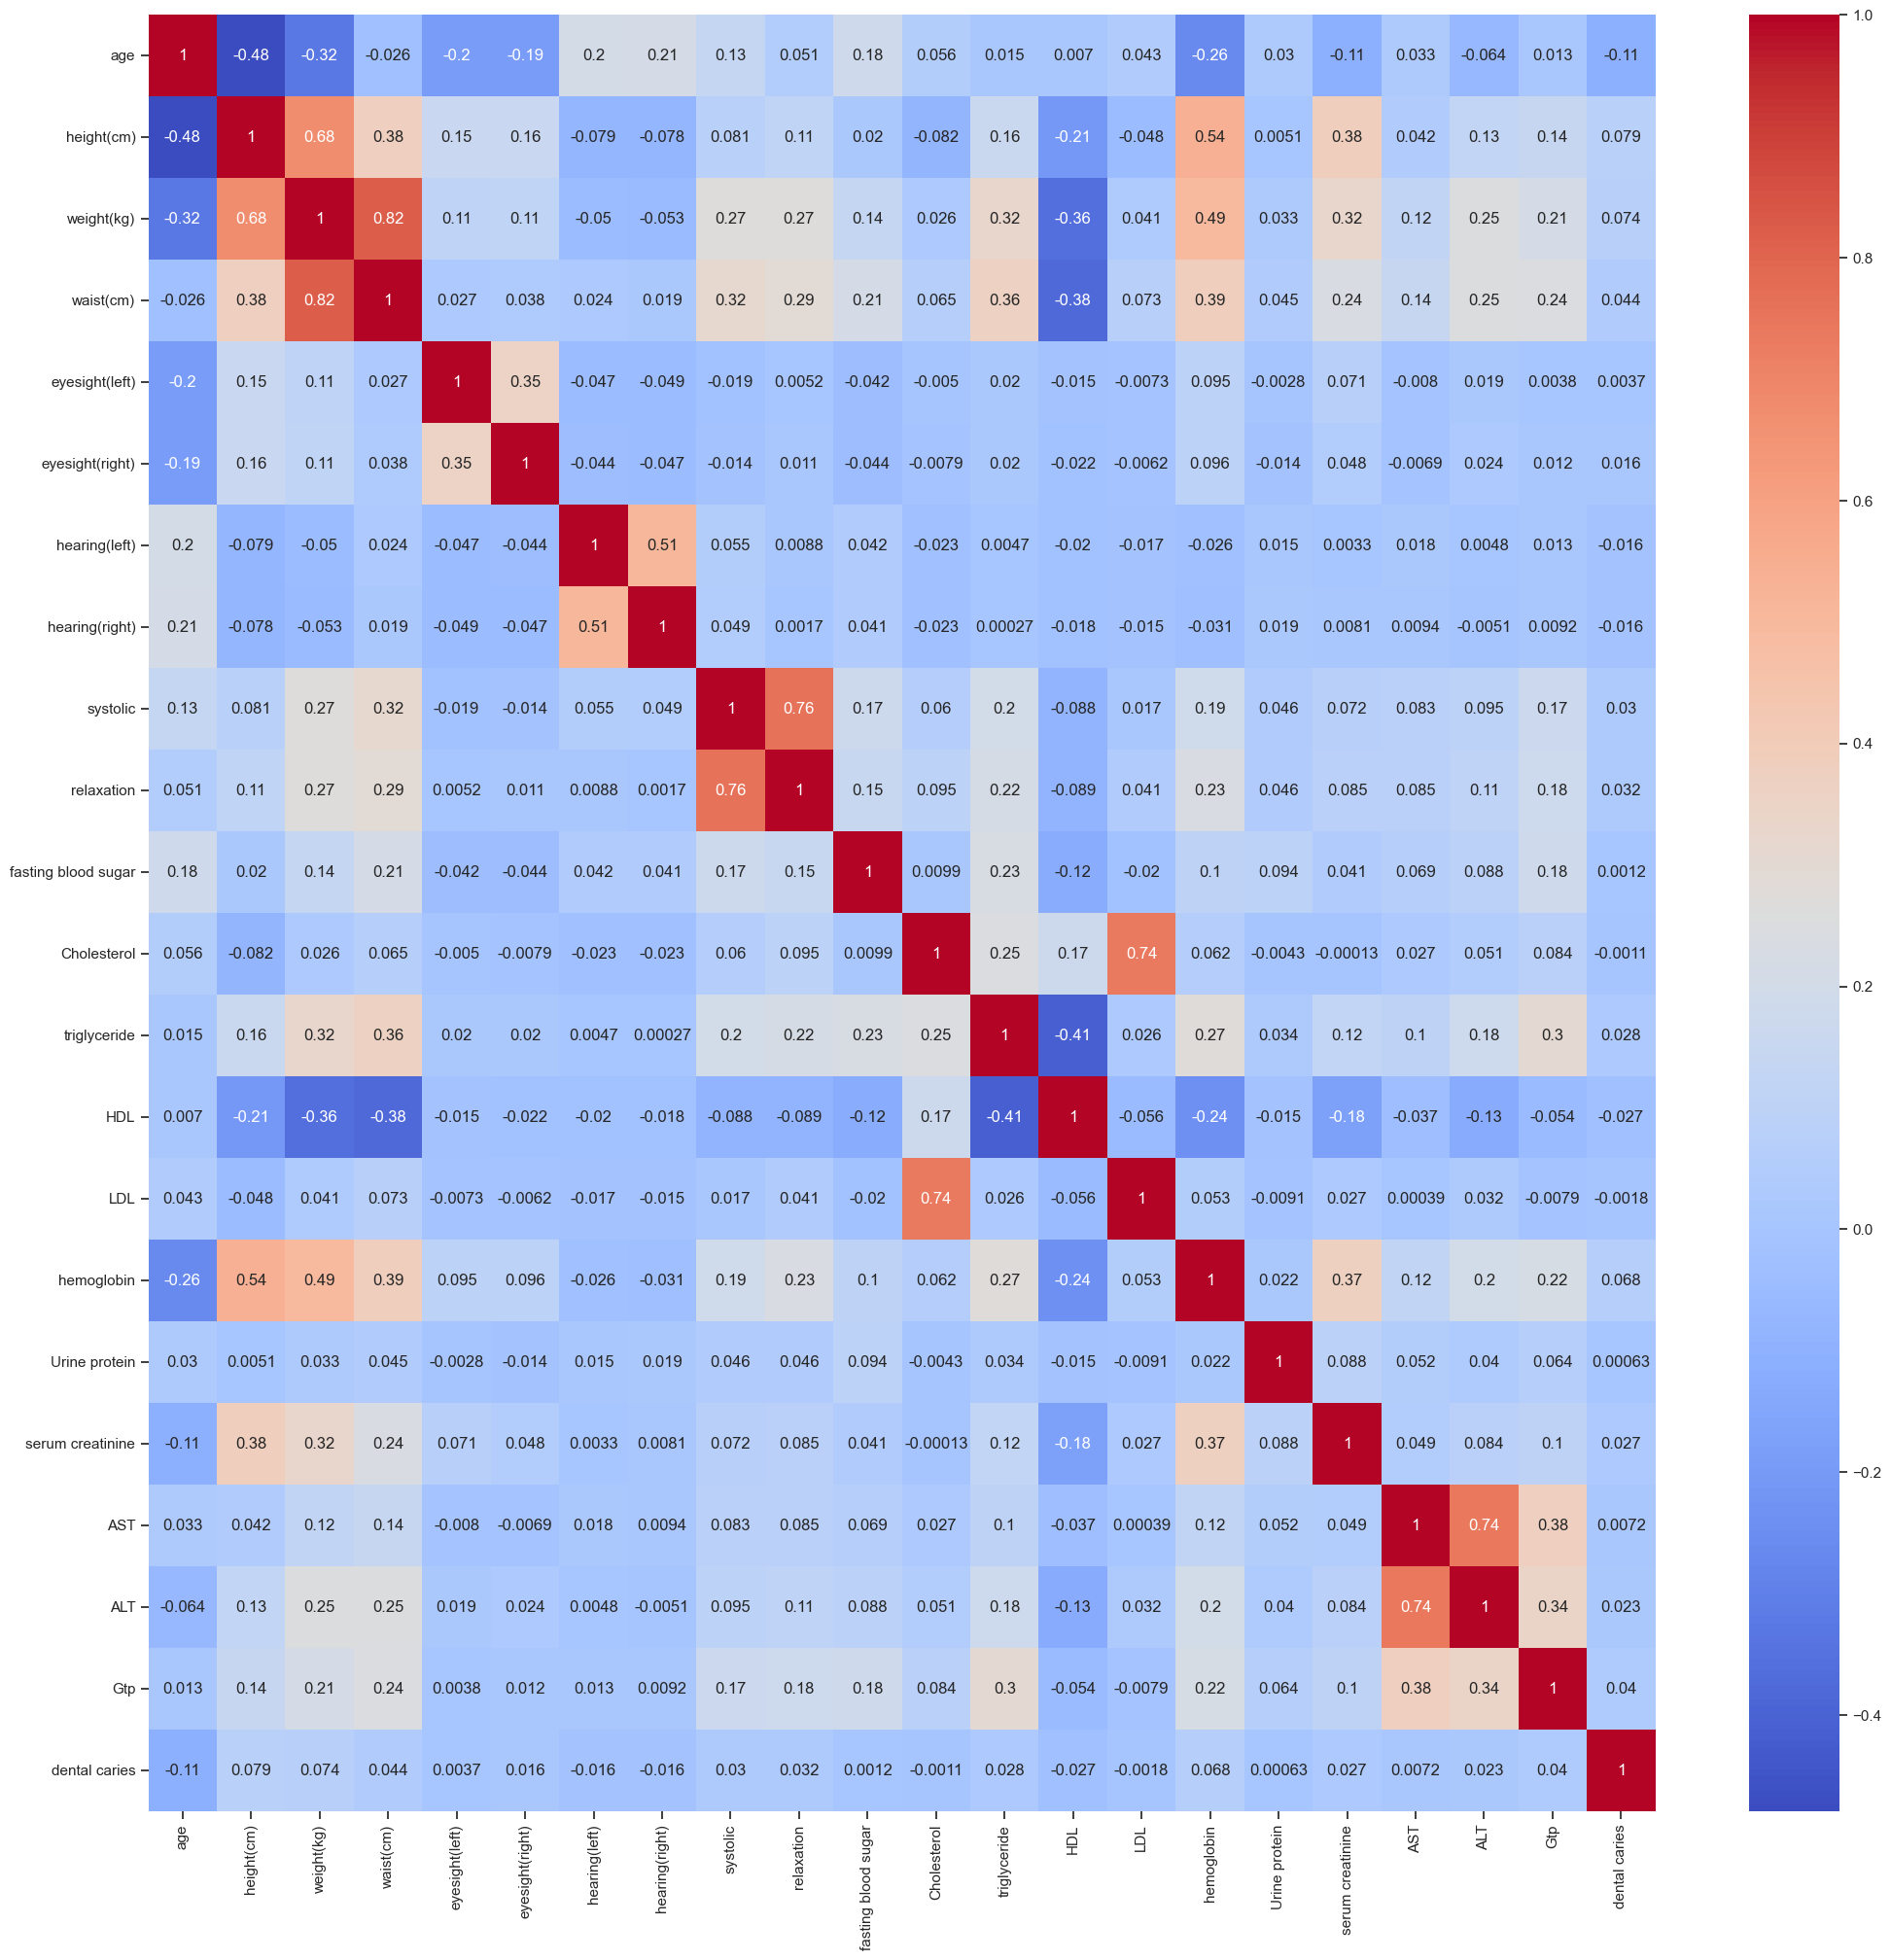

In [85]:
df = df.drop(['ID'], axis=1)

df_without_output = df.drop(['smoking'], axis=1)
plt.figure(figsize=(25,24))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

### turn objects to integers

In [87]:
le = LabelEncoder()
object_columns = [col for col in df.columns if df[col].dtypes == 'object']
df[object_columns] = df[object_columns].apply(le.fit_transform)

In [88]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0


[]

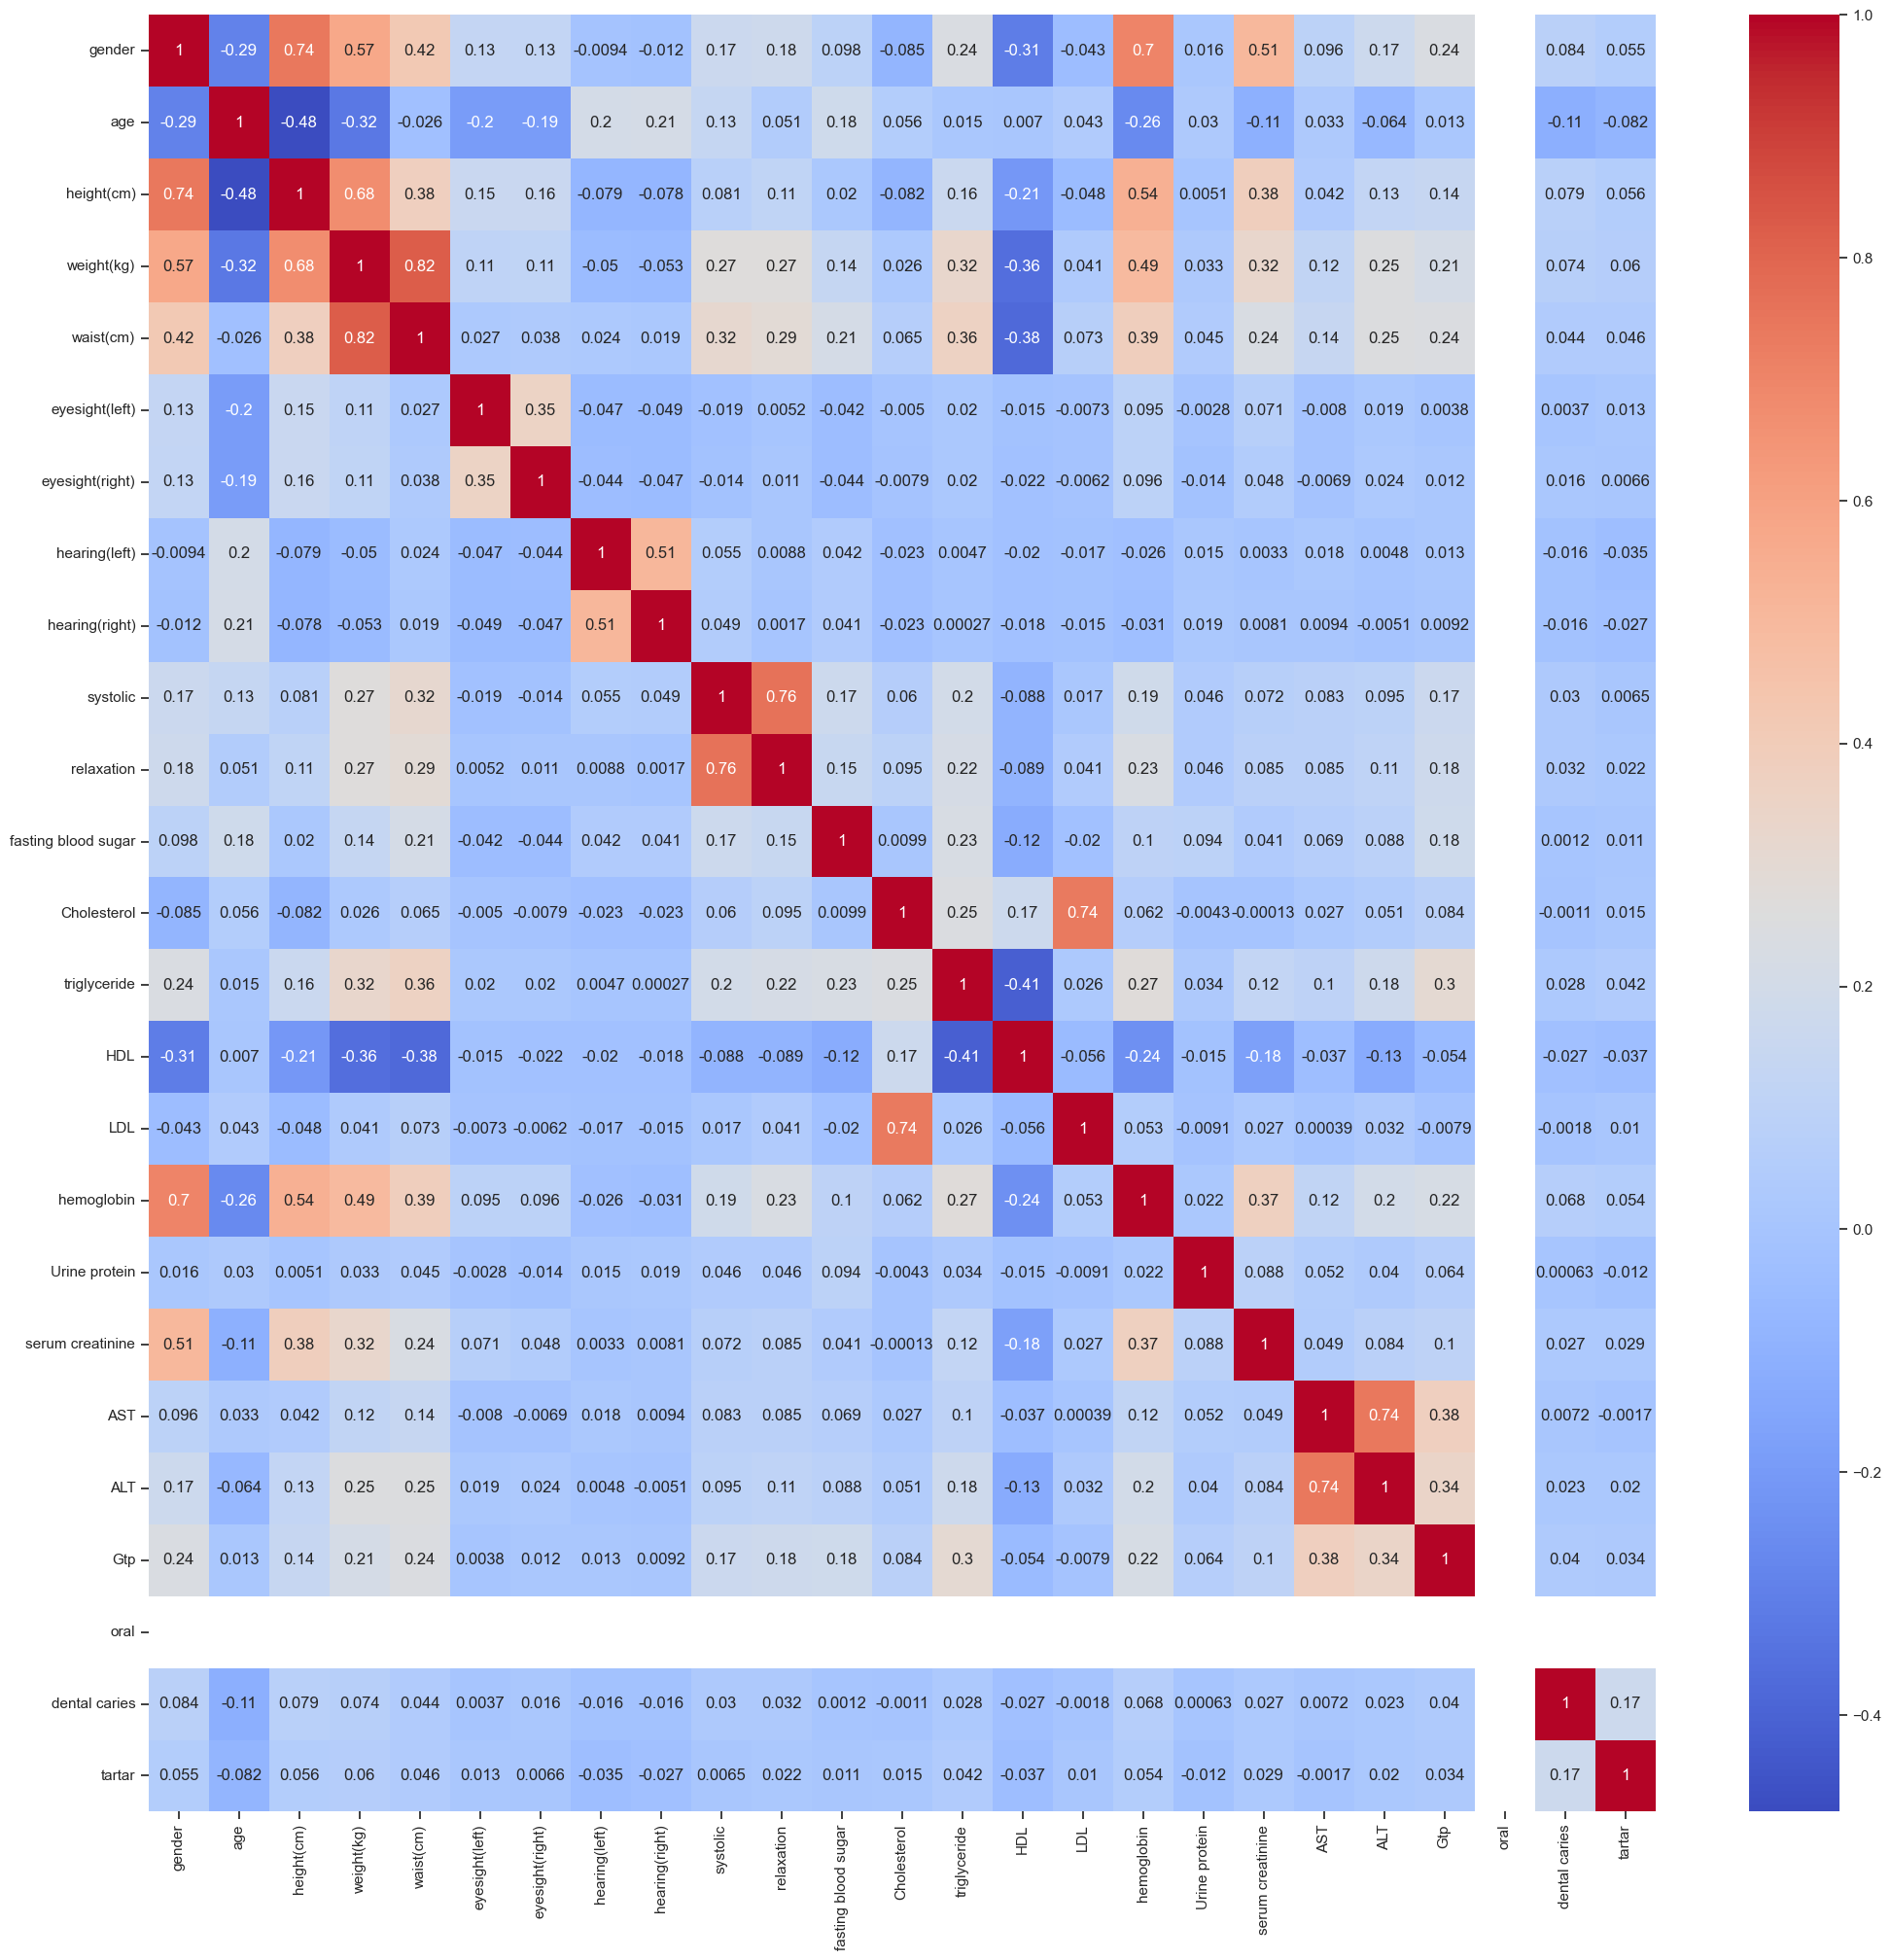

In [89]:
df_without_output = df.drop(['smoking'], axis=1)
plt.figure(figsize=(25,24))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()